In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('./files/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [5]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

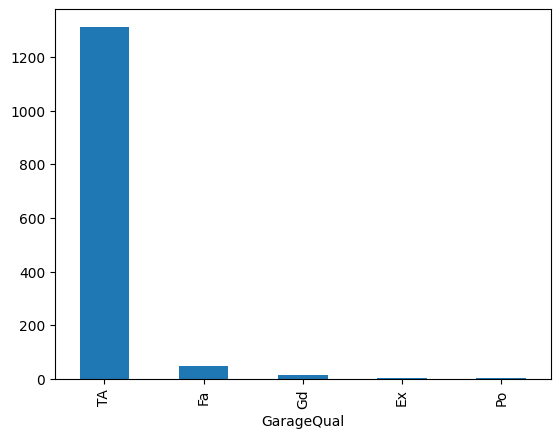

In [6]:
df['GarageQual'].value_counts().plot(kind='bar')

In [3]:
df["GarageQual"].mode()

0    TA
Name: GarageQual, dtype: object

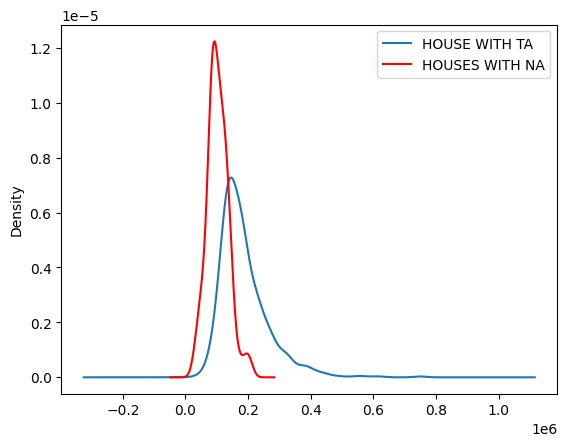

In [6]:
#so now we will plot kde graphs with houses with TA AND HOUSES WITH NA  with respect to saleprice

fig=plt.figure()
ax=fig.add_subplot(111)

df[df["GarageQual"]=="TA"]["SalePrice"].plot(kind='kde',ax=ax)
df[df["GarageQual"].isnull()]["SalePrice"].plot(kind="kde",ax=ax,color="red")
lines,labels=ax.get_legend_handles_labels()
labels=["HOUSE WITH TA","HOUSES WITH NA"]
ax.legend(lines,labels,loc="best")


In [7]:
#now as we know that most frequent values of grarage quality is TA , then we will fill missing values with TA
temp=df[df["GarageQual"]=="TA"]["SalePrice"]

In [8]:
df["GarageQual"].fillna("TA",inplace=True)

<Axes: xlabel='GarageQual'>

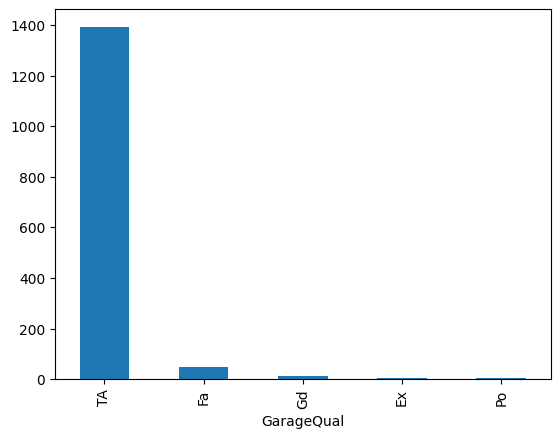

In [10]:
df["GarageQual"].value_counts().plot(kind="bar")

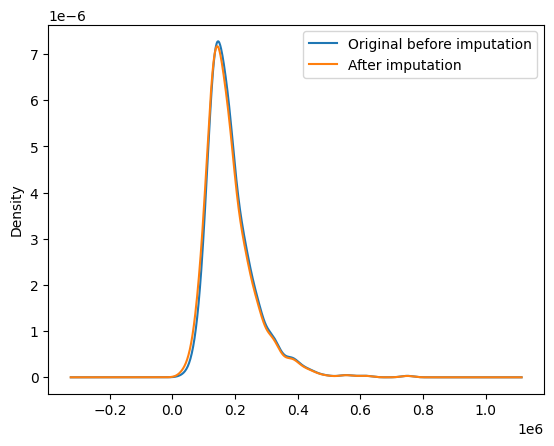

In [12]:
#now we again plot the graph comparing before and after imputation
fig=plt.figure()
ax=fig.add_subplot(111)

#before imputation
temp.plot(kind="kde")
#after imputation
df[df["GarageQual"]=="TA"]["SalePrice"].plot(kind="kde",ax=ax)

lines,labels=ax.get_legend_handles_labels()
labels=["Original before imputation","After imputation"]
ax.legend(lines,labels,loc="best")

<Axes: xlabel='FireplaceQu'>

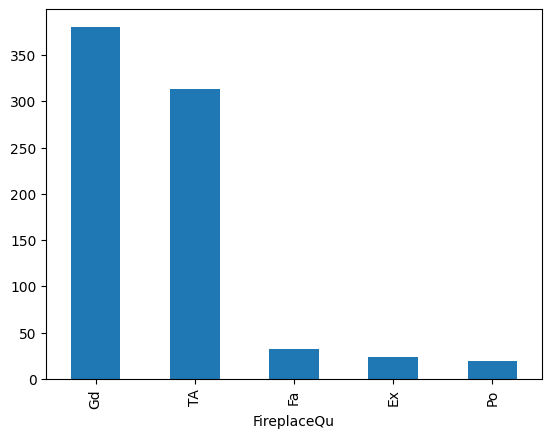

In [13]:
#NOW DO SAME THINF FOR FIREPLACE COL ASWELL

df["FireplaceQu"].value_counts().plot(kind="bar")

In [14]:
df["FireplaceQu"].mode()

0    Gd
Name: FireplaceQu, dtype: object

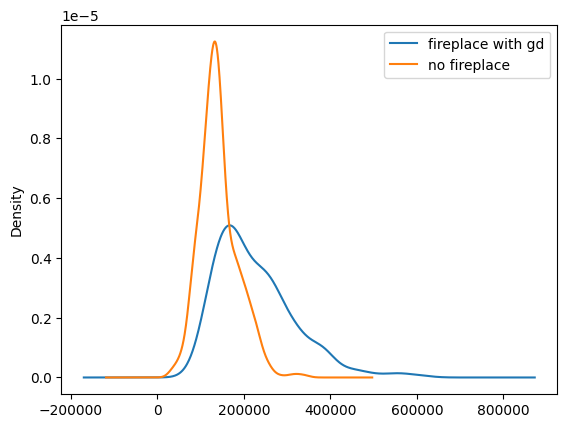

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)

#Houses with gd fireplace
df[df["FireplaceQu"]=="Gd"]["SalePrice"].plot(kind="kde")
df[df["FireplaceQu"].isnull()]["SalePrice"].plot(kind="kde",ax=ax)

lines,labesl=ax.get_legend_handles_labels()
labels=["fireplace with gd","no fireplace"]
ax.legend(lines,labels)

In [16]:
temp2=df[df["FireplaceQu"]=="Gd"]["SalePrice"]

In [17]:
df["FireplaceQu"].fillna("Gd",inplace=True)

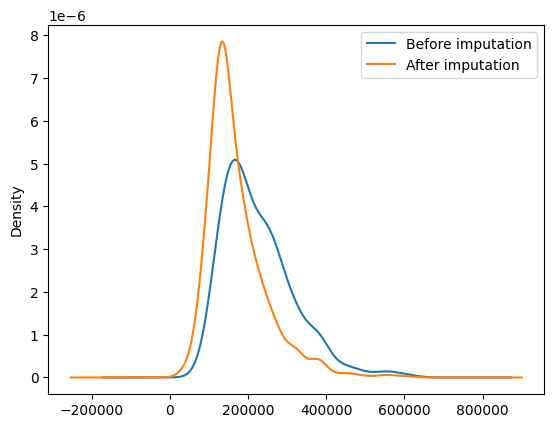

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111)

#Before imputation
temp2.plot(kind="kde")

#After imputation
df[df["FireplaceQu"]=="Gd"]["SalePrice"].plot(kind="kde",ax=ax)

lines,labesl=ax.get_legend_handles_labels()
labels=["Before imputation","After imputation"]
ax.legend(lines,labels)

In [19]:
#NOW USE SIMPLE IMPUTER METHOD TO FILL THE MISSSING VALUES
df.head()

,FireplaceQu,GarageQual,SalePrice
0,Gd,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [21]:
#x=df[["FireplaceQu","GarageQual"]] # alternate method x=df[:,0:2] much better to use
x=df.iloc[:,0:2]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [26]:
imputer=SimpleImputer(strategy="most_frequent") # you have to mention strategy can be mean, 'median', 'most_frequent', 'constant', 'mean'

In [27]:
x_train=imputer.fit_transform(x_train)
x_test=imputer.fit(x_test)

In [28]:
x_test

SimpleImputer(strategy='most_frequent')

In [29]:
x_train

array([['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ...,
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA']], dtype=object)

In [30]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)